In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv("penyakit_jantung.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,male,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,male,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,female,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,female,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,female,0,130,131,0,1,115,1,1.2,1,1,3,0


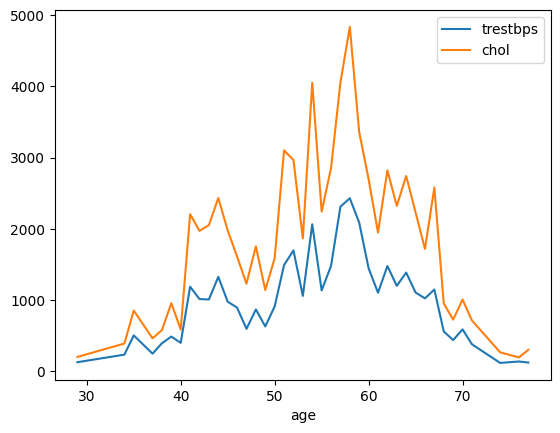

In [4]:
trestbps = data.groupby("age")["trestbps"].sum()
chol = data.groupby("age")["chol"].sum()

sns.lineplot(x = trestbps.index, y = trestbps.values, label = "trestbps")
sns.lineplot(x = chol.index, y = chol.values, label = "chol")
plt.legend()

Pendekatan prosedural

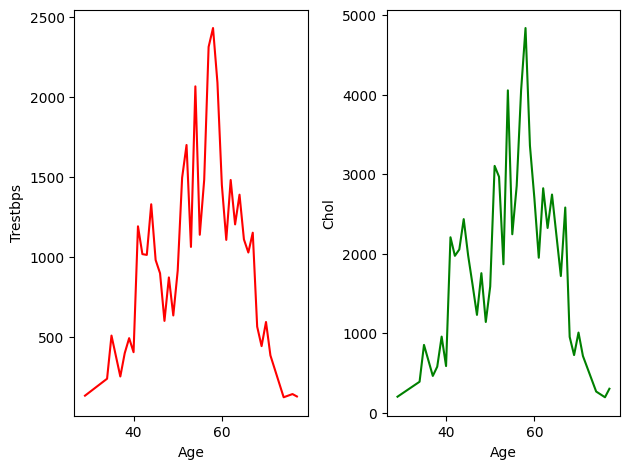

In [5]:
plt.subplot(121) # (baris, kolom, letak plot)
sns.lineplot(x = trestbps.index, y = trestbps.values, color = "red")
plt.xlabel("Age")
plt.ylabel("Trestbps")

plt.subplot(122)
sns.lineplot(x = chol.index, y = chol.values, color = "green")
plt.xlabel("Age")
plt.ylabel("Chol")

plt.tight_layout()
plt.show()

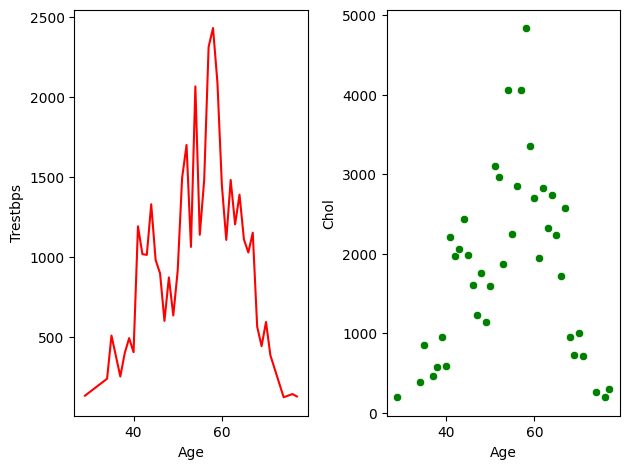

In [6]:
plt.subplot(121) # (baris, kolom, letak plot)
sns.lineplot(x = trestbps.index, y = trestbps.values, color = "red")
plt.xlabel("Age")
plt.ylabel("Trestbps")

plt.subplot(122)
sns.scatterplot(x = chol.index, y = chol.values, color = "green")
plt.xlabel("Age")
plt.ylabel("Chol")

plt.tight_layout()
plt.show()

Pendekatan object oriented

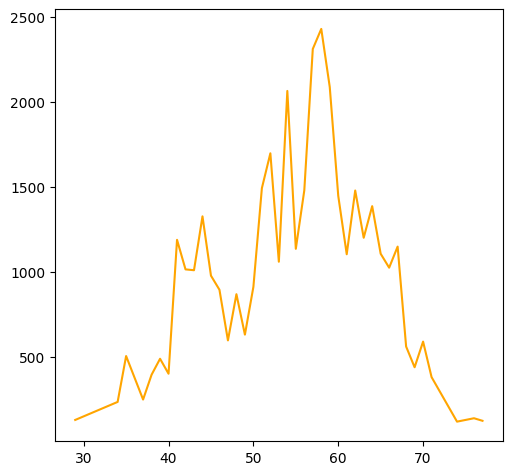

In [7]:
fig = plt.figure()
axes = fig.add_axes([0,0,0.7,0.9]) # (left, bottom, width, height)
axes.plot(trestbps.index, trestbps.values, color = "orange")
plt.show()

Text(0, 0.5, 'Chol')

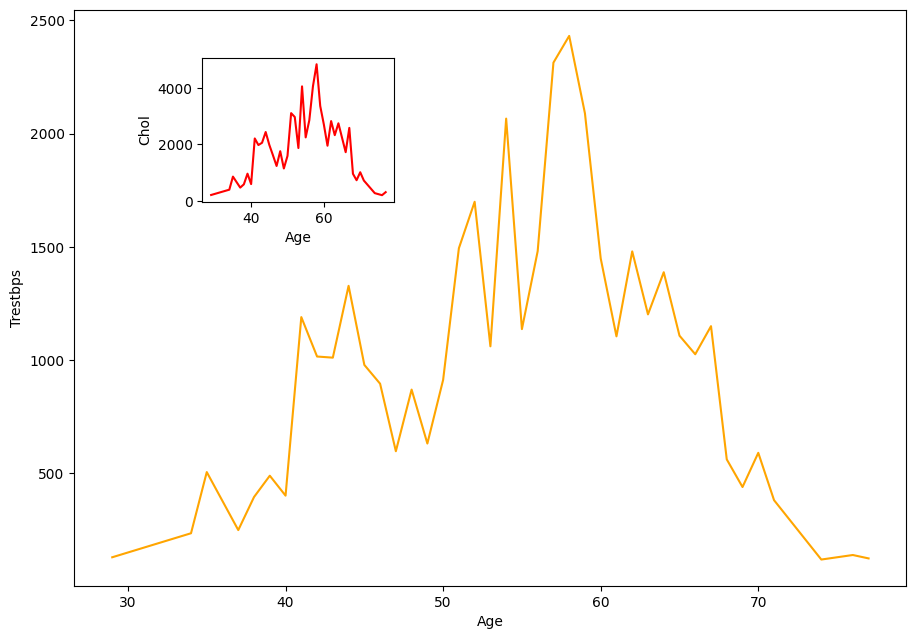

In [8]:
fig = plt.figure()
axes1 = fig.add_axes([0,0,1.3,1.2]) # (left, bottom, width, height)
axes1.plot(trestbps.index, trestbps.values, color = "orange")
axes1.set_xlabel("Age")
axes1.set_ylabel("Trestbps")

axes2 = fig.add_axes([0.2,0.8,0.3,0.3])
axes2.plot(chol.index, chol.values, color = "red")
axes2.set_xlabel("Age")
axes2.set_ylabel("Chol")

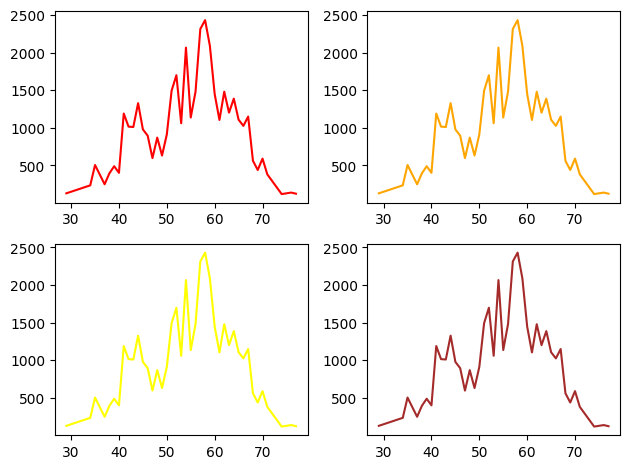

In [9]:
fig, axes = plt.subplots(2,2) # (baris, kolom)

# baris 1 kolom 1
axes[0][0].plot(trestbps.index, trestbps.values, color="red")

# baris 1 kolom 2
axes[0][1].plot(trestbps.index, trestbps.values, color="orange")

# baris 2 kolom 1
axes[1][0].plot(trestbps.index, trestbps.values, color="yellow")

# baris 2 kolom 2
axes[1][1].plot(trestbps.index, trestbps.values, color="brown")

fig.tight_layout()

Assignment

In [10]:
store = pd.read_csv("SampleSuperstore.csv")
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
store.duplicated().sum()

17

In [13]:
store.drop_duplicates(inplace=True)

In [14]:
store.duplicated().sum()

0

<Axes: ylabel='Ship Mode'>

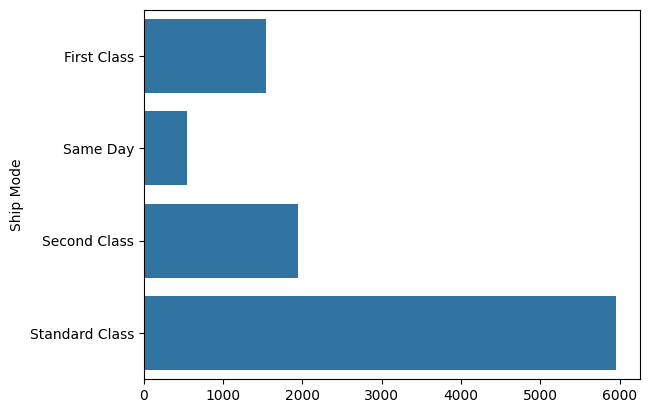

In [15]:
ship = store.groupby("Ship Mode")["Ship Mode"].count()

sns.barplot(y = ship.index, x = ship.values)

sales tertinggi : West
sales terendah : South


<Axes: ylabel='Region'>

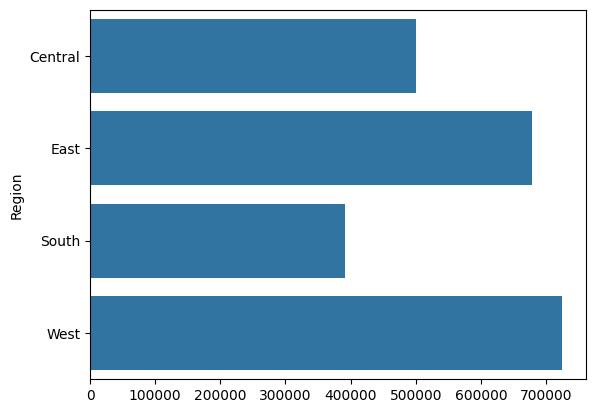

In [16]:
region = store.groupby("Region")["Sales"].sum()

print(f"sales tertinggi : {region.idxmax()}")
print(f"sales terendah : {region.idxmin()}")
sns.barplot(y = region.index, x = region.values)

sales tertinggi : West
sales terendah : South


<Axes: xlabel='Category'>

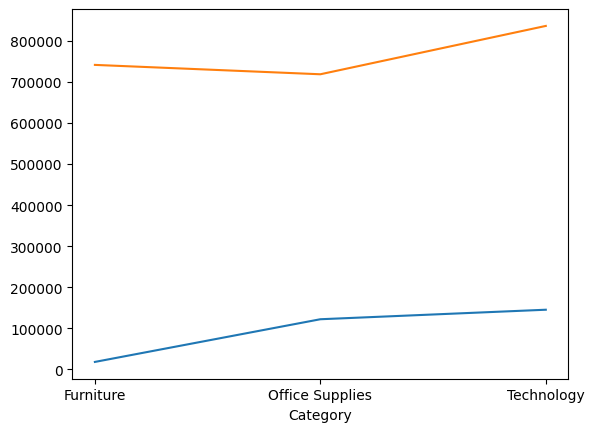

In [17]:
sales = store.groupby("Category")[["Profit", "Sales"]].sum()

print(f"sales tertinggi : {region.idxmax()}")
print(f"sales terendah : {region.idxmin()}")

sns.lineplot(y = sales.values[0:,0] , x = sales.index)
sns.lineplot(y = sales.values[0:,1] , x = sales.index)

In [21]:
sales

,Profit,Sales
Category,,
Furniture,18421.8137,741306.3133
Office Supplies,122291.7128,718492.0840
Technology,145454.9481,836154.0330


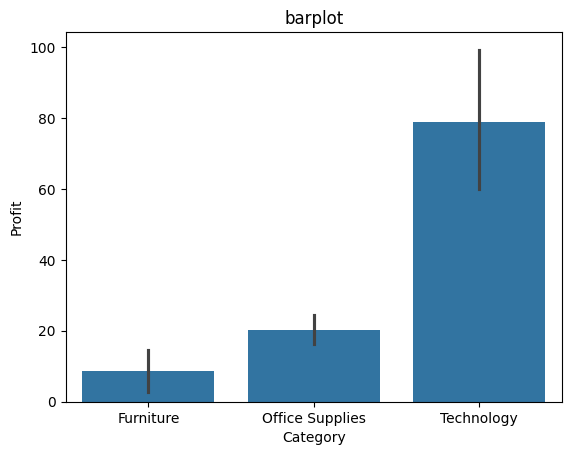

In [18]:
sns.barplot(x = "Category", y = "Profit", data = store)
plt.title("barplot")
plt.show()

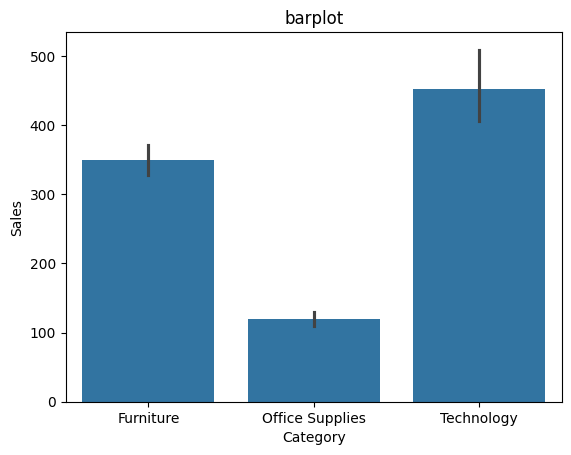

In [19]:
sns.barplot(x = "Category", y = "Sales", data = store)
plt.title("barplot")
plt.show()

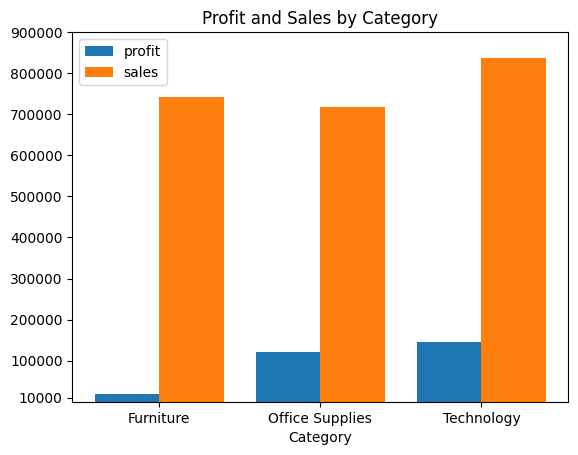

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(sales.index))
width = 0.4

plt.bar(x - width/2, sales.values[0:,0], width = width, label = "profit")
plt.bar(x + width/2, sales.values[0:,1], width = width, label = "sales")

plt.title('Profit and Sales by Category')
plt.xlabel('Category')
plt.yticks([10000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000])  
plt.xticks(x, sales.index)  
plt.legend()
plt.show()